In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [8]:
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

# Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['Amount', 'Time']] = sc.fit_transform(X[['Amount', 'Time']])

#Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

In [16]:
print(X_train)

            Time        V1        V2        V3        V4        V5        V6  \
211605  0.919560 -8.367621  7.402969 -5.114191 -2.966792 -0.985904 -1.660018   
231628  1.095710 -1.290662  0.764452 -0.169233 -1.688528  1.984718 -0.717210   
110643 -0.482329 -0.606860  0.233923  2.633361 -0.155762 -0.328850 -0.070593   
11478  -1.577530  1.374168 -0.330389  0.812971 -0.183112 -1.074771 -0.933788   
243724  1.205211 -2.146505 -7.603113 -4.928224  1.449173 -2.083871 -0.984759   
...          ...       ...       ...       ...       ...       ...       ...   
88290  -0.689433 -1.993953  1.734986 -1.108037 -2.671817  1.605319  3.041992   
22346  -1.318665 -0.440396  1.062920  1.582218 -0.029761  0.040967 -0.903627   
269968  1.454053  0.827820 -2.649344 -3.161235  0.209209 -0.561331 -1.570386   
175960  0.584508 -1.523903 -6.287060 -2.638246  1.330015 -1.672002  1.957509   
47973  -1.081827 -1.608560  0.132746  2.075995 -1.937332 -1.822305 -0.429669   

              V7        V8        V9  .

In [17]:
print(Y_train)

211605    0
231628    0
110643    0
11478     0
243724    0
         ..
88290     0
22346     0
269968    0
175960    0
47973     0
Name: Class, Length: 199364, dtype: int64


In [18]:
print(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
170978  0.539591  0.101337  0.665808 -0.514168 -0.675752  1.087999 -0.681790   
96185  -0.614151 -1.678212  1.244794  0.947874 -2.101099 -0.811015 -1.037444   
30469  -1.239761 -1.407998 -0.094725  1.218361 -1.884626  0.639017 -1.127801   
266925  1.426151  2.025163 -1.001783 -0.855068 -0.506527 -0.793876 -0.197866   
14185  -1.465523  0.477071 -1.295023  0.586617  1.599474 -1.215659  0.114858   
...          ...       ...       ...       ...       ...       ...       ...   
116600 -0.430884 -0.289381  1.125321  1.446190  0.446241  0.205071 -0.870060   
137239 -0.268149 -0.744587  1.143912  1.113239  1.064208 -0.271394 -0.181684   
184018  0.657895  2.007609 -0.014725 -0.857372  1.824368  0.188343  0.055245   
64742  -0.916564  1.079943 -0.156823  1.288267  1.166740 -0.918791  0.350468   
259262  1.352322  2.223422 -0.632968 -1.295563 -0.870125 -0.575393 -1.432570   

              V7        V8        V9  .

In [19]:
print(Y_test)

170978    0
96185     0
30469     0
266925    0
14185     0
         ..
116600    0
137239    0
184018    0
64742     0
259262    0
Name: Class, Length: 85443, dtype: int64


#  Training the Logistic Regression model on the Training set and Predict

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_proba = classifier.predict_proba(X_test)[:, 1]

# Evaluating and testing the confusion matrix

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(Y_test, Y_pred))

[[85280    15]
 [   55    93]]


In [27]:
print(classification_report(Y_test, Y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     85295
           1     0.8611    0.6284    0.7266       148

    accuracy                         0.9992     85443
   macro avg     0.9302    0.8141    0.8631     85443
weighted avg     0.9991    0.9992    0.9991     85443



In [28]:
print("ROC-AUC Score:", roc_auc_score(Y_test, Y_proba))

ROC-AUC Score: 0.9718415261501023


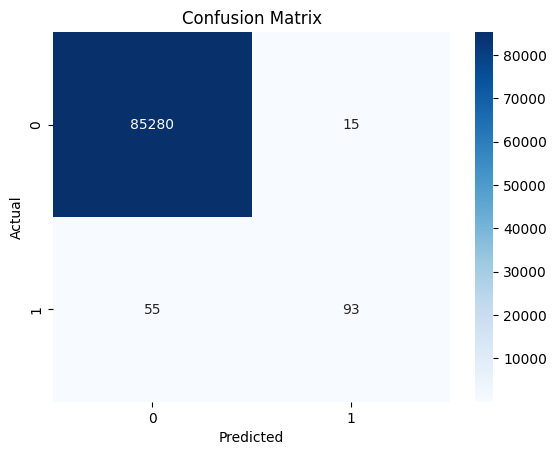

In [30]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()